In [2]:
import networkx as nx
import random

Python’s None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.

In [3]:
# k Nearest neighbor graph construction

# generate N coordinates, range (0, 1)
random.seed(100)
N = 1000
coordinates = [(random.random(), random.random()) for i in range(N)]

In [4]:
# l2 norm function
import math
def l2(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
l2((0, 0), (3, 4))

5.0

In [5]:
#calculate kNN for each node
import heapq
K = math.ceil(2 * math.e * math.log(N))
print("K =", K)
kNN = []
for i in range(N):
    pq = [] # priority queue
    for j in range(N):
        if i == j: # skip myself
            continue
        # note heapq is a min heap implementation (always pops smallest element)
        heapq.heappush(pq, (-1.0 * l2(coordinates[i], coordinates[j]), j)) # use l2 norm
        if len(pq) > K:
            heapq.heappop(pq)
    kNN.append(pq)
assert(K == len(kNN[0]))
# print(kNN[0])

K = 38


In [6]:
# construct graph acoording to kNN
G = nx.Graph()
# add nodes
for i in range(N):
    G.add_node(i, x=coordinates[i][0], y=coordinates[i][1])
assert(G.number_of_nodes() == N)
# add edges
for i in range(N):
    for neighbor in kNN[i]:
        G.add_edge(i, neighbor[1], weight=-neighbor[0]) # neighbor[0] is l2 distance, neighbor[1] is node number
print(G.number_of_edges())

21017


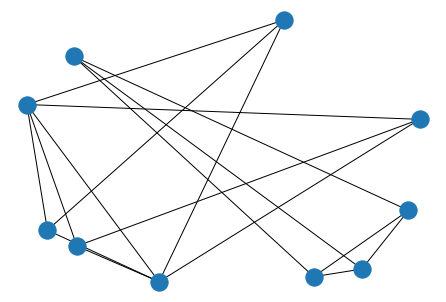

In [47]:
# plot the graph
# import matplotlib.pyplot as plt
# nx.draw(G)

In [66]:
# TODO: r-disc generation


In [27]:
# Sequential A* Search
src = random.randrange(N)
dest = random.randrange(N)
while dest == src:
    dest = random.randrange(N)
print("source: ", src)
print("destination: ", dest)

openSet = [(0, src)]
heapq.heapify(openSet)
closedSet = set()
costToCome = [float('inf') if i != src else 0 for i in range(N)]
prev = [None for i in range(N)]

def reconstruct_path(prev, curr):
    path = [curr]
    while prev[curr]:
        path.insert(0, prev[curr])
        curr = prev[curr]
    return path

def l2_heuristic(curr, dest):
    return math.sqrt((curr[0]-dest[0])**2 + (curr[1]-dest[1])**2)

while len(openSet) > 0:
    _, curr = heapq.heappop(openSet)
    if curr == dest:
        print(costToCome[curr], reconstruct_path(prev, curr))
        break
    if curr in closedSet:
        continue
    closedSet.add(curr)
    for nbr, attr in G.adj[curr].items():
        if nbr in closedSet:
            continue
        gcost = costToCome[curr] + attr['weight']
        fcost = gcost + l2_heuristic((G.nodes[nbr]['x'],G.nodes[nbr]['y']), (G.nodes[dest]['x'],G.nodes[dest]['y']))
        if gcost > costToCome[nbr]:
            continue
        costToCome[nbr] = gcost
        prev[nbr] = curr
        heapq.heappush(openSet, (fcost, nbr))

source:  904
destination:  391
0.15138810389964075 [904, 12, 391]


In [28]:
# Dijkstra's algorithm for comparison and correctness check
unvisited = set(range(N))
dist = [float('inf') for i in range(N)]
dist[src] = 0
prev = [None for i in range(N)]

print("source: ", src)
print("destination: ", dest)

while len(unvisited) > 0:
    _, curr = min([(dist[i], i) for i in unvisited])
    unvisited.remove(curr)
    if curr == dest:
        path = []
        #if prev[curr] or curr == src:
        while curr:
            path.insert(0, curr)
            curr = prev[curr]
        print(dist[dest], path)
        break
    for nbr, attr in G.adj[curr].items():
        alt = dist[curr] + attr['weight']
        if alt < dist[nbr]:
            dist[nbr] = alt
            prev[nbr] = curr

source:  904
destination:  391
0.15138810389964075 [904, 12, 391]
